# Image filtering using cupy
Cupy also comes with drop-in replacements for [scipy's ndimage](https://docs.scipy.org/doc/scipy/reference/ndimage.html) submodule called [cupyx.scipy.ndimage](https://docs.cupy.dev/en/stable/reference/scipy_ndimage.html). It allows us to call common functions such as `gaussian_filter()` with identical parameters.

For importing this submodule, we use again a failsafe pattern:

In [1]:
try:
    import cupy as xp
except:
    import numpy as xp

import numpy as np

try:
    import cupyx.scipy.ndimage as xdi
except:
    import scipy.ndimage as xdi

import scipy.ndimage as ndi
    
xdi

<module 'cupyx.scipy.ndimage' from 'C:\\Users\\haase\\mambaforge\\envs\\cupy39_1\\lib\\site-packages\\cupyx\\scipy\\ndimage\\__init__.py'>

In [2]:
from skimage.io import imread, imshow
from timeit import timeit
import stackview

In [3]:
image = imread("../03b_image_processing/data/blobs.tif")

xp_image = xp.asarray(image)

type(xp_image)

cupy.ndarray

We can then use the `xdi` alias to call the `gaussian_filter()` function without worrying if cupy is installed or not.

In [4]:
xp_blurred = xdi.gaussian_filter(xp_image, sigma=5)

Before we can show the image, we must transfer it back to CPU memory and convert it to a numpy array.

StackViewNDArray([[ 35,  35,  35, ..., 232, 232, 232],
                  [ 35,  35,  35, ..., 232, 232, 232],
                  [ 36,  36,  36, ..., 232, 232, 232],
                  ...,
                  [ 66,  66,  65, ...,  48,  48,  48],
                  [ 66,  66,  65, ...,  49,  48,  48],
                  [ 67,  66,  66, ...,  49,  48,  48]], dtype=uint8)
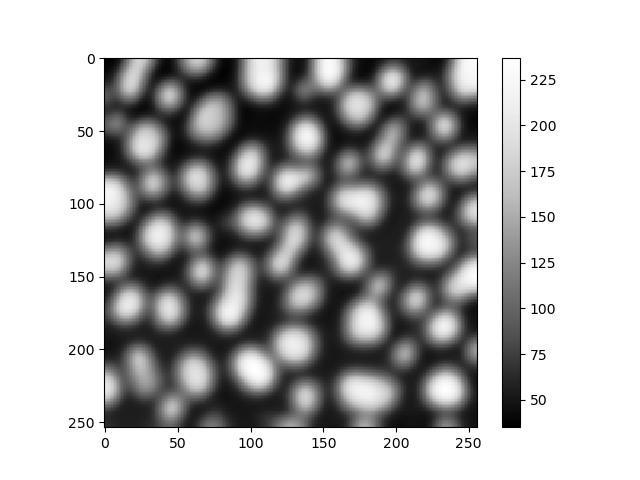
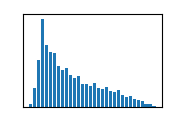

In [5]:
stackview.insight(xp_blurred)

## Quick-and-dirty benchmarking
To get a rough idea about potential speedup using cupy, one can use the [timeit](https://docs.python.org/3/library/timeit.html) jupyter magic.

In [6]:
%%timeit
xdi.gaussian_filter(xp_image, sigma=5)

228 µs ± 8.87 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [7]:
%%timeit
xp_image = xp.asarray(image)
xdi.gaussian_filter(xp_image, sigma=5)

305 µs ± 9.88 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [8]:
%%timeit
ndi.gaussian_filter(image, sigma=5)

1.39 ms ± 22.8 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
